In [284]:
# Importing libraries
import json
import us
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)
sns.set(style="white", color_codes=True)

import sys
sys.path.insert(0, '/Users/lizzieriordan/Desktop/Bootcamp/')
import Functions_EDA

import plotly.figure_factory as ff
import plotly.express as px  
import warnings
warnings.filterwarnings('ignore')

In [285]:
# Import dataset from US department of Housing and Urban Development and assign to variable name 'df'
df = pd.read_csv('/Users/lizzieriordan/Desktop/Final Project/homelessness by state.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   State                       51 non-null     object 
 1   Homeless people per 10,000  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 944.0+ bytes


In [286]:
# Check first rows of data
df.head(5)

,State,"Homeless people per 10,000"
0,"Washington, DC",72.491944
1,New York,52.730500
2,Vermont,50.890860
3,Oregon,47.579250
4,California,46.554113


In [287]:
# Check for irregularities in State names
df['State'].unique()

array(['Washington, DC', 'New York', 'Vermont', 'Oregon', 'California',
       'Hawaii', 'Washington', 'Alaska', 'Maine', 'Massachusetts',
       'Nevada', 'Colorado', 'Montana', 'Arizona', 'New Mexico',
       'New Hampshire', 'Rhode Island', 'Minnesota', 'South Dakota',
       'Florida', 'Tennessee', 'Nebraska', 'Delaware', 'Idaho',
       'Oklahoma', 'Georgia', 'New Jersey', 'Missouri', 'Utah',
       'Kentucky', 'North Dakota', 'Pennsylvania', 'Ohio', 'Illinois',
       'Maryland', 'Wyoming', 'North Carolina', 'Texas', 'Kansas',
       'Michigan', 'Indiana', 'Arkansas', 'Connecticut', 'Iowa',
       'Wisconsin', 'West Virginia', 'Virginia', 'South Carolina',
       'Louisiana', 'Alabama', 'Mississippi'], dtype=object)

In [288]:
# Import dataset of total population of States in 2023 and assign to variable name 'population'
population = pd.read_csv('/Users/lizzieriordan/Desktop/Final Project/population estimates - Sheet1.csv')
population.head(5)

,States,2023_pop
0,.Alabama,"5,108,468"
1,.Alaska,"733,406"
2,.Arizona,"7,431,344"
3,.Arkansas,"3,067,732"
4,.California,"38,965,193"


In [289]:
# Remove the leading dot from state names
population['States'] = population['States'].str.lstrip('.')

# Preview the cleaned data
print(population.head())

       States    2023_pop
0     Alabama   5,108,468
1      Alaska     733,406
2     Arizona   7,431,344
3    Arkansas   3,067,732
4  California  38,965,193


In [290]:
# Standardize column names
population.rename(columns={'States': 'State'}, inplace=True)

# Clean spaces from both datasets and make abbreviations
population['State'] = population['State'].str.strip()
df['State'] = df['State'].str.strip()

population['State'] = population['State'].map(lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else None)
df['State'] = df['State'].map(lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else None)

# Preview both datasets
print(population.head())
print(df.head())

  State    2023_pop
0    AL   5,108,468
1    AK     733,406
2    AZ   7,431,344
3    AR   3,067,732
4    CA  38,965,193
  State  Homeless people per 10,000
0  None                   72.491944
1    NY                   52.730500
2    VT                   50.890860
3    OR                   47.579250
4    CA                   46.554113


In [291]:
# Merge datasets on 'State' and assign to variable 'merged_data_old'
merged_data_old = pd.merge(population, df, on='State', how='inner')

# Change null value for Washington DC to abbreviation:
merged_data_old.loc[merged_data_old['State'].isnull(), 'State'] = 'DC'

# # Preview the merged dataset
merged_data_old.head(10)

,State,2023_pop,"Homeless people per 10,000"
0,AL,"5,108,468",6.467692
1,AK,"733,406",35.641923
2,AZ,"7,431,344",19.158042
3,AR,"3,067,732",8.504654
4,CA,"38,965,193",46.554113
5,CO,"5,877,610",24.566108
6,CT,"3,617,176",8.335232
7,DE,"1,031,890",12.065240
8,DC,"678,972",72.491944
9,FL,"22,610,726",13.602394


In [292]:
merged_data_old.dtypes

State                          object
2023_pop                       object
Homeless people per 10,000    float64
dtype: object

In [293]:
# Change 2023_pop column to int in order to find percentages
merged_data_old['2023_pop'] = merged_data_old['2023_pop'].replace(',', '', regex=True).astype(int)
merged_data_old['Homeless people per 10,000'] = merged_data_old['Homeless people per 10,000'].replace(',', '', regex=True).astype(int)

In [294]:
# Create 2 copies of merged dataset to work with
new = merged_data_old.copy()
copy_df = merged_data_old.copy()

In [295]:
# Check data types of copy
print(new.dtypes)

State                         object
2023_pop                       int64
Homeless people per 10,000     int64
dtype: object


In [296]:
# Calculate the total number of homeless people and create new column
new['Total Homeless'] = (new['Homeless people per 10,000'] / 10_000) * new['2023_pop']

# Calculate the percentage of the total population
new['% individuals experiencing homelessness'] = new['Total Homeless'] / new['2023_pop'] * 100
new['Total Homeless'] = new['Total Homeless'].round(0).astype(int)

# Format as percentage with 2 decimal places
new['% individuals experiencing homelessness'] = new['% individuals experiencing homelessness'].apply(lambda x: '{:.2f}%'.format(x))

# Change state names to abbreviations:
new['State'] = new['State'].map(lambda x: us.states.lookup(x).abbr if isinstance(x, str) and us.states.lookup(x) else None)

# Sort high to low values
new.sort_values(by='% individuals experiencing homelessness', ascending=False)

# Change DC
new.loc[new['State'].isnull(), 'State'] = 'DC'

# show data
new.head(10)

,State,2023_pop,"Homeless people per 10,000",Total Homeless,% individuals experiencing homelessness
0,AL,5108468,6,3065,0.06%
1,AK,733406,35,2567,0.35%
2,AZ,7431344,19,14120,0.19%
3,AR,3067732,8,2454,0.08%
4,CA,38965193,46,179240,0.46%
5,CO,5877610,24,14106,0.24%
6,CT,3617176,8,2894,0.08%
7,DE,1031890,12,1238,0.12%
8,DC,678972,72,4889,0.72%
9,FL,22610726,13,29394,0.13%


In [297]:
# Create dataframe for lower states
lower_5_states = new.sort_values(by='% individuals experiencing homelessness', ascending=False).tail(5).reset_index()

Create choropleth of homeless population by percentage per State

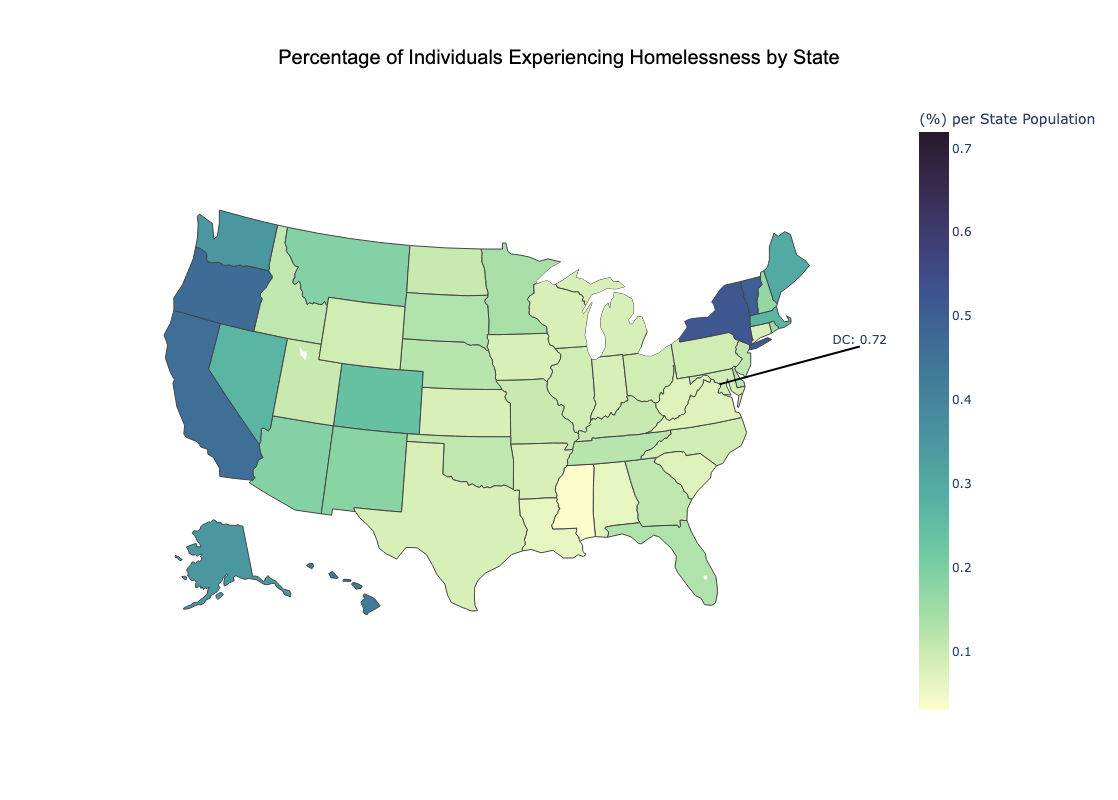

In [298]:
# Remove the percentage sign and convert to float
new['% individuals experiencing homelessness'] = new['% individuals experiencing homelessness'].str.rstrip('%').astype(float)

# Create choropleth graph:
fig = px.choropleth(
    new,
    locations="State",  # State abbreviations
    locationmode="USA-states",  # Use state abbreviations
    color="% individuals experiencing homelessness",  # Data to color by
    color_continuous_scale="deep", 
    scope="usa",  # Focus on USA
    title="Percentage of Individuals Experiencing Homelessness by State",
    labels={'% individuals experiencing homelessness': '(%) per State Population'}  # Rename the color bar title
)

# Edit the graph:
fig.update_layout(
    width=1000,  
    height=800,
    title={
        'text': "Percentage of Individuals Experiencing Homelessness by State",  # Title text
        'x': 0.5,  # Center the title 
        'xanchor': 'center',  # Anchor text to the center
        'yanchor': 'top'  # Anchor text to the top
    },
    title_font=dict(
        family="Roboto",  # Font family
        size=20,  # Font size
        color="black",  # Font color
    )
)

# Add a line pointing to Washington, D.C.:
fig.add_trace(
    go.Scattergeo(
        locationmode='USA-states',
        lon=[-77.0369, -65], 
        lat=[38.9072, 38.9072],    
        mode='lines+text',
        line=dict(width=2, color='black'),
        text=["", "DC: 0.72"],  # Show value at the end of the line
        textposition="top center",
        showlegend=False
    )
)

fig.show()

In [299]:
# Create dataframe of top five states with homelessness
top_5_states = new.sort_values(by='% individuals experiencing homelessness', ascending=False).head(5).reset_index()

# Show dataframe
top_5_states

,index,State,2023_pop,"Homeless people per 10,000",Total Homeless,% individuals experiencing homelessness
0,8,DC,678972,72,4889,0.72
1,32,NY,19571216,52,101770,0.52
2,45,VT,647464,50,3237,0.50
3,37,OR,4233358,47,19897,0.47
4,4,CA,38965193,46,179240,0.46


Create bar graph with top 5 states visualization 

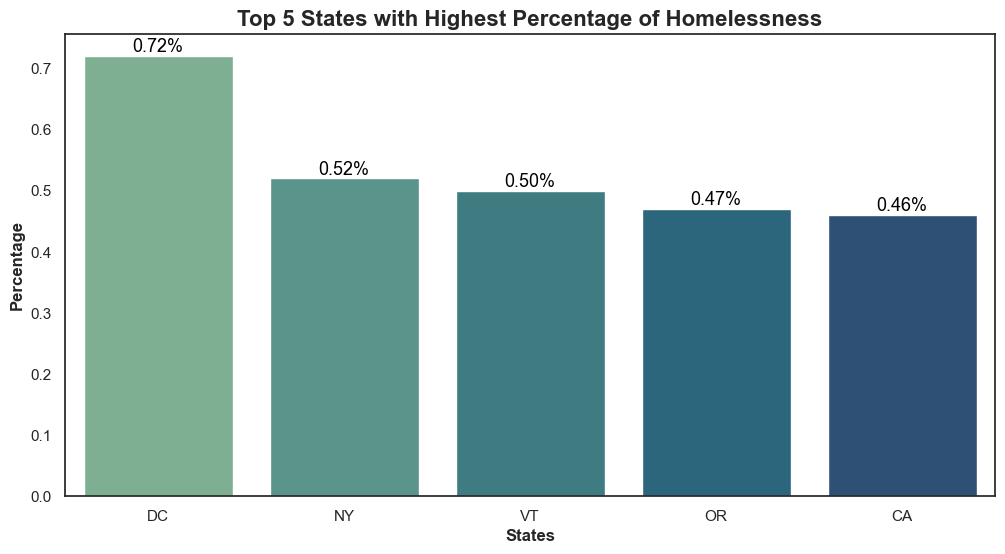

In [278]:
# Remove the percentage sign and convert to float
# top_5_states['% individuals experiencing homelessness'] = top_5_states['% individuals experiencing homelessness'].replace('%', '', regex=True).astype(float)

# Sort states:
d_sorted = top_5_states.sort_values(by='% individuals experiencing homelessness', ascending=False)

# Set plot size:
plt.figure(figsize=(12,6))

# Create plot:
ax = sns.barplot(x='State', y='% individuals experiencing homelessness', palette="crest", data=d_sorted)

# Title
plt.title('Top 5 States with Highest Percentage of Homelessness', fontsize=16, fontweight='bold')

# Axis labels
plt.xlabel('States', fontweight = 'bold')
plt.ylabel('Percentage', fontweight = 'bold')

# Add values on top of each bar:
for bar in ax.patches:  
    yval = bar.get_height() 
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        yval - 0.00,  
        f'{yval:.2f}%',
        ha='center',  
        va='bottom',  
        fontsize=13,  
        color="black"  
    )
    
# Show the plot
plt.show()

In [279]:
# Import dataset that shows change of percentages from 2018-2023
change_df = pd.read_csv('/Users/lizzieriordan/Desktop/Final Project/increase of homeless per state - increase of homeless per state.csv')

# Show data
change_df.sort_values(by='% change in homelessness 2018-2023', ascending=False).head(5)

,State,2018,2023,2023-2018,% change in homelessness 2018-2023
0,Vermont,20.662546,50.890860,30.228314,146.295208
5,New Hampshire,10.700602,17.410171,6.709569,62.702731
3,Maine,18.774396,30.507508,11.733112,62.495282
7,Rhode Island,10.393283,16.515171,6.121888,58.902347
9,New Mexico,12.183857,18.170889,5.987031,49.139047


In [280]:
# Filter top 5 and lower 5 states based on percentages
states_of_interest = ['California', 'Vermont', 'Oregon', 'New York', 'Mississippi', 'West Virginia', 'Louisiana', 'Alabama', 'Wisconsin']

# Filter the Dataframe to only show rows with these specific states
filtered_df = change_df[change_df['State'].isin(states_of_interest)]

# Show filtered data
filtered_df

,State,2018,2023,2023-2018,% change in homelessness 2018-2023
0,Vermont,20.662546,50.890860,30.228314,146.295208
1,California,32.956481,46.554113,13.597632,41.259357
2,Oregon,34.602291,47.579250,12.976959,37.503179
10,New York,47.020333,52.730500,5.710167,12.144037
24,West Virginia,6.882793,7.999679,1.116886,16.227228
32,Louisiana,6.558115,6.928671,0.370555,5.650335
38,Wisconsin,8.446773,8.223713,-0.223060,-2.640769
41,Alabama,7.020158,6.467692,-0.552465,-7.869698
44,Mississippi,4.532534,3.340488,-1.192046,-26.299761


Create bar graph visualizing change in percentages over past 5 years

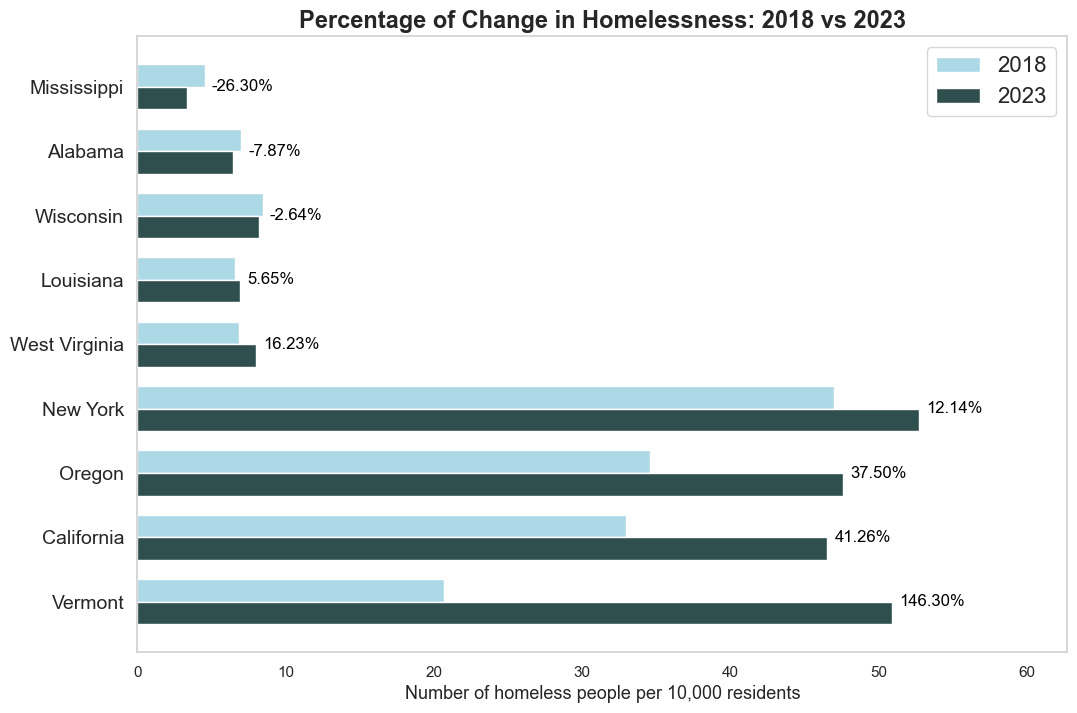

In [281]:
# Set plot size:
fig, ax = plt.subplots(figsize=(12, 8)) 

# Create bar positions and set width:
y = np.arange(len(filtered_df['State']))
bar_width = 0.35

# Create the bars (plot 2018 first, followed by 2023)
bars1 = ax.barh(y + bar_width / 2, filtered_df['2018'], bar_width, label='2018', color='lightblue')
bars2 = ax.barh(y - bar_width / 2, filtered_df['2023'], bar_width, label='2023', color='darkslategrey')

# Add the legend and set the correct order:
ax.legend(['2018', '2023'], fontsize=16)

# Add percentage of change to the ends of bars:
for i, change in enumerate(filtered_df['% change in homelessness 2018-2023']):
    bar_2018 = bars2[i] 
    bar_2023 = bars1[i]  
    
    # Get the right-most end position of the longest bar
    max_bar_end = max(bar_2018.get_width(), bar_2023.get_width()) 
    
    # Add the annotation to the right of the longest bar
    ax.text(
        max_bar_end + .5,  
        y[i], 
        f"{change:.2f}%",  
        ha='left',  
        va='center', 
        fontsize=12, 
        color='black'
    )

# Expand right margin
ax.set_xlim(0, filtered_df['2023'].max() + 10) 

# Set the border color to light grey
for spine in ax.spines.values():
    spine.set_color('lightgrey')

# Add labels and title with larger font sizes
ax.set_yticks(y)
ax.set_yticklabels(filtered_df['State'], fontsize=14) 
ax.set_xlabel('Number of homeless people per 10,000 residents', fontsize=13) 
ax.set_title('Percentage of Change in Homelessness: 2018 vs 2023', fontsize=17, fontweight='bold', family='arial') 

# Show the plot
plt.show()

Show breakdown by race/ethnicity

In [282]:
# Import dataset with race/ethnicity
race = pd.read_csv('/Users/lizzieriordan/Desktop/Final Project/homeless_race.csv')

# Drop columns not in use
race.drop(race[race['Race/Ethnicity'] == 'Non-Hispanic'].index, axis=0, inplace=True)
race.drop(race[race['Race/Ethnicity'] == 'General Population'].index, axis=0, inplace=True)
race.drop(race[race['Race/Ethnicity'] == 'Native Hawaiian or Other Pacific Islander'].index, axis=0, inplace=True)

# Change row name 
race.loc[6, 'Race/Ethnicity'] = 'Indigenous'

# Sort and show data
race.sort_values(by='Homeless per 10,000', ascending = False).reset_index()

,index,Race/Ethnicity,Category,"Homeless per 10,000"
0,4,Black,Race,53.661978
1,6,Indigenous,Race,52.749351
2,8,Multiple Races,Race,38.948799
3,2,Hispanic,Ethnicity,28.168985
4,3,White,Race,12.911415
5,5,Asian,Race,5.523543


Create bubble map to show homelessness percentages of race/ethnicity 

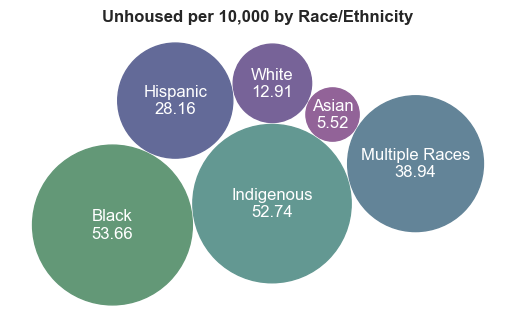

In [283]:
# Create dataframe based off of race dataset with custom colors:
data = {
    'Race/Ethnicity': ['Black\n53.66', 'Indigenous\n52.74', 'Multiple Races\n38.94', 'Hispanic\n28.16', 'White\n12.91', 'Asian\n5.52'],
    'Unhoused per 10,000': [54, 53, 39, 28, 13, 6],
    'color': ['#639877', '#639892', '#638498', '#636a98', '#776398', '#926398']
}

# Copied code
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center', color='white', fontname='arial')


bubble_chart = BubbleChart(area=data['Unhoused per 10,000'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, data['Race/Ethnicity'], data['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Unhoused per 10,000 by Race/Ethnicity', fontweight='bold')

plt.show()

Find out what minimum wage is in these top 5 states:

In [73]:
# Create dataset based off of public data collected for top 5 states
data2 = {
    "State": ["Washington DC", "New York", "Vermont", "California", "Oregon"],
    "MinimumWage": [17.50, 15.00, 13.67, 16.00, 14.70],  
    "SSTax": [7.65, 7.65, 7.65, 7.65, 7.65], #percentage of income that is taxed for Medicair and SS - Federal
    "IncomeTax":[10, 9.5, 7, 8, 12.5], # income tax percentage based on minimum wage amounts. includes federal and state tax
}

# Create dataframe 
dataframe = pd.DataFrame(data2)

Equation to create a column that shows net income after taxes:

In [75]:
# Calculate Gross Income (40 hours/week, 52 weeks/year)
dataframe["GrossIncome"] = dataframe["MinimumWage"] * 40 * 52

# Calculate Net Income
dataframe["NetIncome"] = dataframe["GrossIncome"] * (1 - (dataframe["SSTax"] + dataframe["IncomeTax"]) / 100)

# Create new column showing average rent for one bedroom per state in 2024 (lower end):
dataframe["AvgRent"] = [2000, 2100, 1500, 1700, 1500]

# Create column that shows percentage of income that would be spent on average rent if making minimum wage:
dataframe["IncRentPercentage"] = (dataframe["AvgRent"] * 12 / dataframe["NetIncome"]) * 100

# Show data
dataframe

,State,MinimumWage,SSTax,IncomeTax,GrossIncome,NetIncome,AvgRent,IncRentPercentage
0,Washington DC,17.50,7.65,10.0,36400.0,29975.4000,2000,80.065654
1,New York,15.00,7.65,9.5,31200.0,25849.2000,2100,97.488510
2,Vermont,13.67,7.65,7.0,28433.6,24268.0776,1500,74.171512
3,California,16.00,7.65,8.0,33280.0,28071.6800,1700,72.671105
4,Oregon,14.70,7.65,12.5,30576.0,24414.9360,1500,73.725362


Repeat process for lower 5 states

In [71]:
data3 = {
    "State": ["Mississippi", "Alabama", "Louisiana", "Wisconsin", "West Virginia"],
    "MinimumWage": [7.25, 7.25, 7.25, 7.25, 8.75],  
    "SSTax": [7.65, 7.65, 7.65, 7.65, 7.65], #percentage of income that is taxed for Medicair and SS - Federal
    "IncomeTax":[5.5, 4, 2, 1.75, 4.7], # income tax percentage based on minimum wage amounts. includes federal and state tax
}

lower = pd.DataFrame(data3)

# Calculate Gross Income (40 hours/week, 52 weeks/year)
lower["GrossIncome"] = lower["MinimumWage"] * 40 * 52

# Calculate Net Income
lower["NetIncome"] = lower["GrossIncome"] * (1 - (lower["SSTax"] + lower["IncomeTax"]) / 100)

# Create new column showing average rent for one bedroom per state in 2024:
lower["AvgRent"] = [600, 500, 700, 750, 600]

# create column that shows percentage of income that would be spent on average rent if making minimum wage:
lower["IncRentPercentage"] = (lower["AvgRent"] * 12 / lower["NetIncome"]) * 100

# Show data
lower

,State,MinimumWage,SSTax,IncomeTax,GrossIncome,NetIncome,AvgRent,IncRentPercentage
0,Mississippi,7.25,7.65,5.50,15080.0,13096.98,600,54.974506
1,Alabama,7.25,7.65,4.00,15080.0,13323.18,500,45.034294
2,Louisiana,7.25,7.65,2.00,15080.0,13624.78,700,61.652372
3,Wisconsin,7.25,7.65,1.75,15080.0,13662.48,750,65.873838
4,West Virginia,8.75,7.65,4.70,18200.0,15952.30,600,45.134557


In [78]:
# Combine the two dataframes:
combined = pd.concat([dataframe, lower],axis=0, ignore_index=True)
combined

,State,MinimumWage,SSTax,IncomeTax,GrossIncome,NetIncome,AvgRent,IncRentPercentage
0,Washington DC,17.50,7.65,10.00,36400.0,29975.4000,2000,80.065654
1,New York,15.00,7.65,9.50,31200.0,25849.2000,2100,97.488510
2,Vermont,13.67,7.65,7.00,28433.6,24268.0776,1500,74.171512
3,California,16.00,7.65,8.00,33280.0,28071.6800,1700,72.671105
4,Oregon,14.70,7.65,12.50,30576.0,24414.9360,1500,73.725362
5,Mississippi,7.25,7.65,5.50,15080.0,13096.9800,600,54.974506
6,Alabama,7.25,7.65,4.00,15080.0,13323.1800,500,45.034294
7,Louisiana,7.25,7.65,2.00,15080.0,13624.7800,700,61.652372
8,Wisconsin,7.25,7.65,1.75,15080.0,13662.4800,750,65.873838
9,West Virginia,8.75,7.65,4.70,18200.0,15952.3000,600,45.134557


Create split bar graph that shows tax percentage amounts taken out of paycheck for minimum wage earners per state

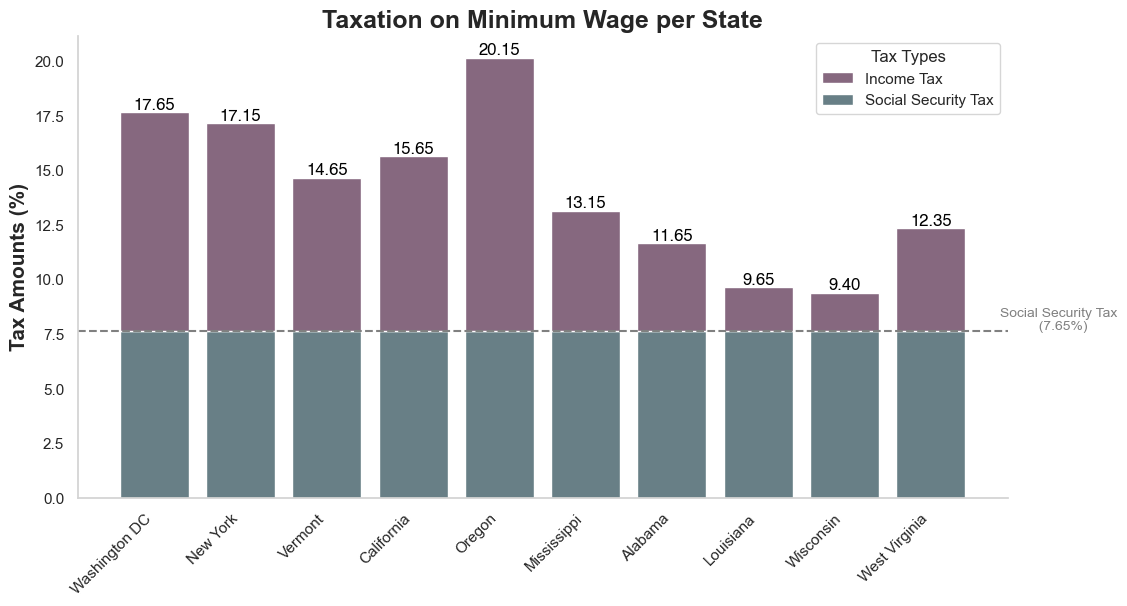

In [84]:
# Create plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot stacked bar chart
bars1 = ax.bar(combined['State'], combined['SSTax'], label="Social Security Tax", color='#687F86') 
bars2 = ax.bar(combined['State'], combined['IncomeTax'], bottom=combined['SSTax'], label="Income Tax", color='#86687F')

# Add a light gray dotted line at the threshold of the Social Security Tax
ax.axhline(y=7.65, color='gray', linestyle='--', linewidth=1.5)

# Add label to the gray dotted line
ax.text(9.8, 7.65 + .5, 'Social Security Tax\n          (7.65%)', color='gray', fontsize=10, va='center')

# Set labels and title
ax.set_ylabel('Tax Amounts (%)', fontweight='bold', fontsize=15)
ax.set_title('Taxation on Minimum Wage per State', fontweight='bold', fontsize=18)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Remove the right and top spine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the border color to light grey
ax.spines['bottom'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')

# Add values on top of the bars
for i in range(len(combined)):
    total = combined['SSTax'][i] + combined['IncomeTax'][i] 
    ax.text(i, total, f'{total:.2f}', ha='center', va='bottom', fontsize=12, color='black', fontname='Helvetica')

# Manually set the order of the legend to ensure Income Tax is on top of Social Security Tax
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[1], handles[0]], ['Income Tax', 'Social Security Tax'], title='Tax Types')

# Show plot
plt.show()

Combine lower and upper states into one dataset

In [89]:
merged_df = pd.concat([top_5_states, lower_5_states],axis=0, ignore_index=True)
merged_df

,index,State,2023_pop,"Homeless people per 10,000",Total Homeless,% individuals experiencing homelessness
0,8,DC,678972,72.491944,4922,0.72
1,32,NY,19571216,52.730500,103200,0.53
2,45,VT,647464,50.890860,3295,0.51
3,37,OR,4233358,47.579250,20142,0.48
4,4,CA,38965193,46.554113,181399,0.47
5,48,WV,1770071,7.999679,1416,0.08
6,49,WI,5910955,8.223713,4861,0.08
7,18,LA,4573749,6.928671,3169,0.07
8,0,AL,5108468,6.467692,3304,0.06
9,24,MS,2939690,3.340488,982,0.03


Create bar graph to compare lower and upper states

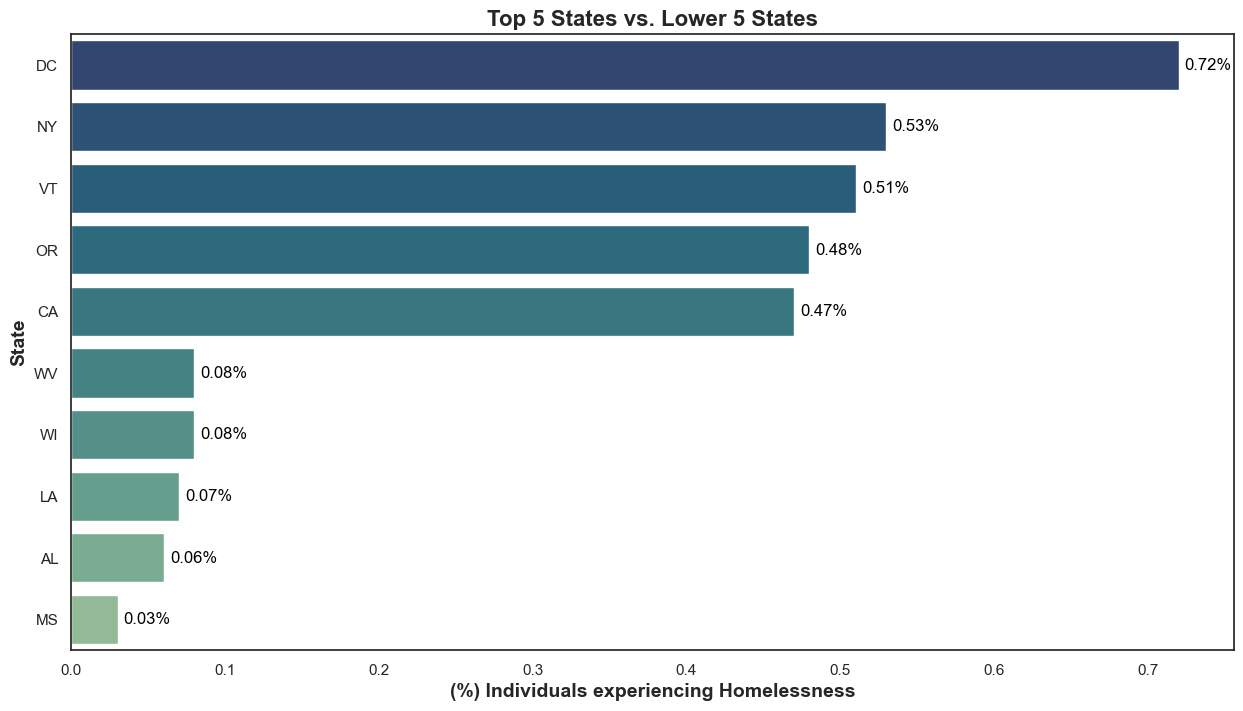

In [90]:
merged_df['% individuals experiencing homelessness'] = merged_df['% individuals experiencing homelessness'].replace('%', '', regex=True).astype(float)

# Sort dataframe
top_bottom_states = merged_df.sort_values('% individuals experiencing homelessness', ascending=False)

# Create plot
fig, ax = plt.subplots(figsize=(15, 8))

# Use barplot for continuous data (percentage of homelessness)
g = sns.barplot(x='% individuals experiencing homelessness', y='State', data=top_bottom_states, palette='crest_r')

# Set plot titles
plt.title("Top 5 States vs. Lower 5 States", fontsize=16, fontweight='bold')
plt.ylabel('State', fontweight='bold', fontsize = 14)
plt.xlabel('(%) Individuals experiencing Homelessness', fontweight='bold', fontsize = 14)

# Add values to the ends of the bars:
for p in g.patches:
    width = p.get_width()
    g.text(width + 0.004, p.get_y() + p.get_height() / 2, f'{width:.2f}%', 
           ha='left', va='center', fontsize=12, color='black')
    
# Show the plot
plt.show()

Create bar graph showing percentage of income to rent ratio per state

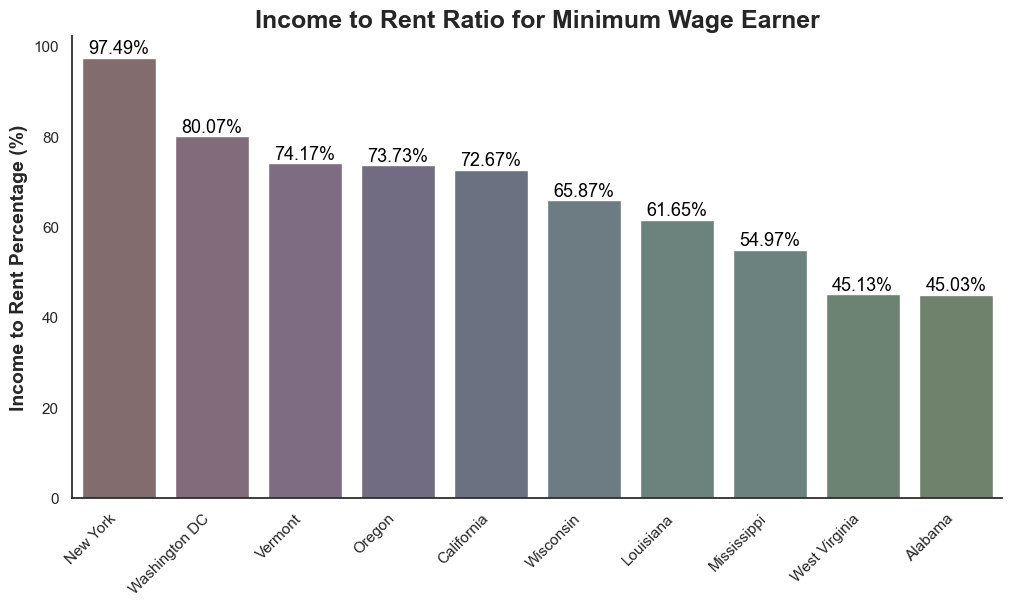

In [118]:
# Sort the Dataframe by 'IncRentPercentage' in descending order
df_sorted = combined.sort_values(by='IncRentPercentage', ascending=False)

# Custom colors used
hex_colors = ['#86686B', '#86687E', '#7F6886', '#706886', '#686F86', '#687E86', '#68867F', '#688680', '#688671', '#6C8668']

# Create plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='State', y='IncRentPercentage', data=df_sorted, palette = hex_colors)

# Set labels and title
plt.ylabel('Income to Rent Percentage (%)', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.title('Income to Rent Ratio for Minimum Wage Earner', fontsize=18, fontweight='bold')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Remove the top and right spines
sns.despine(top=True, right=True)

# Add values on top of bars
for bar in ax.patches: 
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  
        yval - 0.00,  
        f'{yval:.2f}%',  
        ha='center',  
        va='bottom',  
        fontsize=13, 
        color="black")

# Show the plot
plt.show()

Create choropleth graph to compare with global data:

In [92]:
# Create dataset
data4 = {
    "Country": ['Austria', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Netherlands', 'Portugal', 
               'Spain', 'Sweden', 'United Kingdom', 'Canada', 'United States', 'Australia', 'Japan', 'South Korea'],
    "EstimatedNumber": [19667, 5789, 3686, 333000, 262600, 1387, 13179, 96197, 30600, 10773, 28552, 33269, 164578, 40713, 653104,
                        122494, 2820, 8986], # Estimated number of homeless population per country
    "PopulationSize":[8.98, 5.93, 5.57, 69.6, 84.29, 10.21, 5.35, 59.03, 18.23, 10.23, 47.98, 10.64, 68.07, 39.19, 335.84, 26.71, 123.7, 51.79]
} # Size of general population

# Convert to dataframe
df_global = pd.DataFrame(data4)

In [96]:
# Calculate percentages of homelessness per population
data4["Percentage"] = [
    (homeless / (population * 1000000)) 
    for homeless, population in zip(data4["EstimatedNumber"], data4["PopulationSize"])
]

# Convert to Dataframe
df_global = pd.DataFrame(data4)

# Format the 'Percentage' column to 2 decimal places and add a percentage sign
df_global["Percentage"] = (df_global["Percentage"] * 100).round(2).astype(str) + '%'

df_global.head(5)

,Country,EstimatedNumber,PopulationSize,Percentage
0,Austria,19667,8.98,0.22%
1,Denmark,5789,5.93,0.1%
2,Finland,3686,5.57,0.07%
3,France,333000,69.60,0.48%
4,Germany,262600,84.29,0.31%


Combine df_global with individual U.S. state data

In [212]:
# Rename columns for consistency
df_state = copy_df.rename(columns={"State": "Location", "Homeless people per 10,000": "Percentage"})
df_global.rename(columns={"Country": "Location"}, inplace=True)

# Add a "Type" column to distinguish global vs. state data
df_global["Type"] = "Country"
df_state["Type"] = "State"

df_state['Percentage'] = df_state.apply(
    lambda row: f"{row['Percentage']/100:.2f}%" if row['Type'] == 'State' else row['Percentage'],
    axis=1)

# Combine both datasets
global_state = pd.concat([df_global[["Location", "Percentage", "Type"]], df_state[["Location", "Percentage", "Type"]]])

global_state[global_state['Type'] == 'Country'].sort_values(by='Percentage', ascending=False)

global_state

,Location,Percentage,Type
0,Austria,0.22%,Country
1,Denmark,0.1%,Country
2,Finland,0.07%,Country
3,France,0.48%,Country
4,Germany,0.31%,Country
...,...,...,...
46,VA,0.08%,State
47,WA,0.36%,State
48,WV,0.08%,State
49,WI,0.08%,State


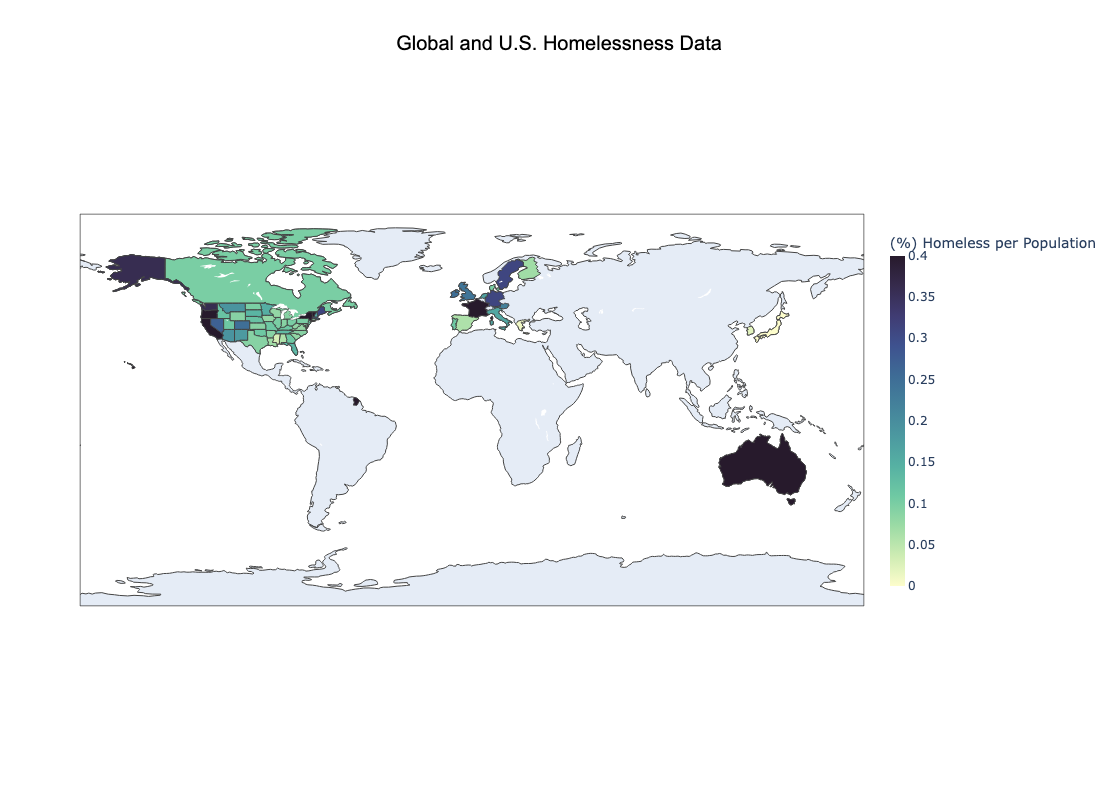

In [213]:
# Convert percentage values to numeric
global_state['Percentage'] = global_state['Percentage'].str.rstrip('%').astype(float)

# Separate global (country) data and U.S. state data
global_data = global_state[global_state['Type'] == 'Country']
us_data = global_state[global_state['Type'] == 'State']

# Create the global choropleth map
fig = px.choropleth(
    global_data,
    locations='Location',
    locationmode='country names', 
    color='Percentage',
    color_continuous_scale='deep',
    title="Global and U.S. Homelessness Data",
    labels={"Percentage": "(%) Homeless per Population"},
    range_color=(0, .4)
)

# Add U.S. state-level data on top of the global map
fig.add_choropleth(
    locations=us_data['Location'],
    locationmode='USA-states', 
    z=us_data['Percentage'],
    coloraxis="coloraxis", 
)

# Set the hovertemplate to format percentage values properly
fig.update_traces(
    hovertemplate='%{location}: %{z:.2f}'  # Show as a percentage with 2 decimal places
)

fig.update_layout(
    title={
        'text': "Global and U.S. Homelessness Data",  
        'x': 0.5, 
        'xanchor': 'center', 
        'yanchor': 'bottom'},
    
    title_font=dict(
        family="Roboto", 
        size=20, 
        color="black"),
    
    coloraxis_colorbar=dict(
        thickness=15,
        len=0.6,),
    
    width=1000, 
    height=800,
)

fig.show()

Create bar graph with select OECD country data

In [214]:
# List of states and countries to filter
selected_locations = [
    "NY", "DC", "VT", "OR", "CA",
    "France", "Germany",
    "Ireland", 'Spain', 'Sweden'
]

# Filter the global_state dataframe to include only the selected locations
filtered_df = global_state[global_state["Location"].isin(selected_locations)]

# Display dataframe
filtered_df

,Location,Percentage,Type
3,France,0.48,Country
4,Germany,0.31,Country
6,Ireland,0.25,Country
10,Spain,0.06,Country
11,Sweden,0.31,Country
4,CA,0.47,State
8,DC,0.72,State
32,NY,0.53,State
37,OR,0.48,State
45,VT,0.51,State


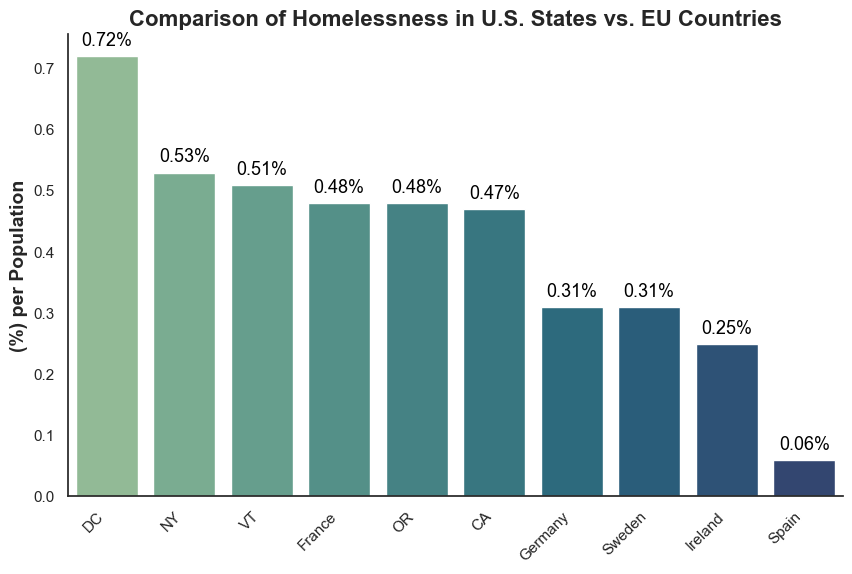

In [215]:
filtered_df['Percentage'] = filtered_df['Percentage'].replace('%', '', regex=True).astype(float)

# Sort the dataframe by Percentage in descending order
df_sorted = filtered_df.sort_values(by='Percentage', ascending=False)

# Create plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Location', y='Percentage', data=df_sorted, palette='crest')

# Set labels and title
plt.ylabel('(%) per Population', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.title('Comparison of Homelessness in U.S. States vs. EU Countries', fontsize=16, fontweight='bold')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Remove the top and right spines
sns.despine(top=True, right=True)

# Add the percentage values above each bar
for bar in ax.patches:
    yval = bar.get_height()  
    ax.text(
        bar.get_x() + bar.get_width() / 2,  
        yval + 0.01,
        f'{yval:.2f}%', 
        ha='center',  
        va='bottom', 
        fontsize=13,  
        color='black')

# Display the plot
plt.show()